In [12]:
# Using CoinMarketCap API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '22041784-5954-41d3-a983-a6ace14ba285',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
 # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
#pd.set_option('display.max_columns', None)

In [14]:
import pandas as pd

# transforming the data to a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19361600.000000,19361600.000000,...,46.692300,586544153271.239990,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
1,1027,Ethereum,ETH,ethereum,6810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120393879.506120,120393879.506120,...,18.896000,219010254532.529999,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
2,825,Tether,USDT,tether,52351,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81718117573.085846,85090638896.270050,...,7.049100,85072429185.679993,None,2023-05-01T20:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-01 20:13:08.931116+00:00
3,1839,BNB,BNB,bnb,1308,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155862509.781332,155862509.781332,...,4.403700,51040405917.919998,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
4,3408,USD Coin,USDC,usd-coin,12115,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30394235524.498596,30394235524.498596,...,2.624000,30385515998.169998,None,2023-05-01T20:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-01 20:13:08.931116+00:00


In [15]:
# automating the gathering of data
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '22041784-5954-41d3-a983-a6ace14ba285',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df2])
    
    if not os.path.isfile(r'Coinbase_API.csv'):
        df.to_csv(r'Coinbase_API.csv', header ='column_names')
    else:
        df.to_csv(r'Coinbase_API.csv', mode='a', header=False)


In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API runner completed!")
    sleep(60) # sleep for 1 minute
exit()

API runner completed!
API runner completed!


KeyboardInterrupt: 

In [16]:
df_test = pd.read_csv(r'Coinbase_API.csv')

In [17]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10196,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19361600.000000,19361600.000000,...,46.692300,586544153271.239990,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
1,1027,Ethereum,ETH,ethereum,6810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120393879.506120,120393879.506120,...,18.896000,219010254532.529999,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
2,825,Tether,USDT,tether,52351,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,81718117573.085846,85090638896.270050,...,7.049100,85072429185.679993,None,2023-05-01T20:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-01 20:13:08.931116+00:00
3,1839,BNB,BNB,bnb,1308,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155862509.781332,155862509.781332,...,4.403700,51040405917.919998,None,2023-05-01T20:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-01 20:13:08.931116+00:00
4,3408,USD Coin,USDC,usd-coin,12115,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30394235524.498596,30394235524.498596,...,2.624000,30385515998.169998,None,2023-05-01T20:11:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-01 20:13:08.931116+00:00


In [18]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [19]:
## checking the columns 
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [21]:
df3 = df.groupby('name', sort=False)[['quote.USD.volume_change_24h','quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.volume_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,
Bitcoin,31.987900,-1.760426,20.580791
Ethereum,41.936800,0.086577,13.966400
Tether,44.097400,-0.020224,-0.032774
BNB,33.818400,3.971544,4.443257
USD Coin,14.677400,-0.002384,-0.030870
XRP,83.627100,-9.287901,12.607978
Cardano,38.923100,-3.055056,-2.418368
Dogecoin,23.928600,-5.093690,-19.491614
Polygon,10.930900,-13.767489,-14.577425


In [22]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.volume_change_24h     31.987900
             quote.USD.percent_change_30d    -1.760426
             quote.USD.percent_change_90d    20.580791
Ethereum     quote.USD.volume_change_24h     41.936800
             quote.USD.percent_change_30d     0.086577
             quote.USD.percent_change_90d    13.966400
Tether       quote.USD.volume_change_24h     44.097400
             quote.USD.percent_change_30d    -0.020224
             quote.USD.percent_change_90d    -0.032774
BNB          quote.USD.volume_change_24h     33.818400
             quote.USD.percent_change_30d     3.971544
             quote.USD.percent_change_90d     4.443257
USD Coin     quote.USD.volume_change_24h     14.677400
             quote.USD.percent_change_30d    -0.002384
             quote.USD.percent_change_90d    -0.030870
XRP          quote.USD.volume_change_24h     83.627100
             quote.USD.percent_change_30d    -9.287901
             quote.USD.

In [23]:
type(df4)

pandas.core.series.Series

In [25]:
df4.count()

45

In [26]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.volume_change_24h   31.987900
            quote.USD.percent_change_30d  -1.760426
            quote.USD.percent_change_90d  20.580791
Ethereum    quote.USD.volume_change_24h   41.936800
            quote.USD.percent_change_30d   0.086577
            quote.USD.percent_change_90d  13.966400
Tether      quote.USD.volume_change_24h   44.097400
            quote.USD.percent_change_30d  -0.020224
            quote.USD.percent_change_90d  -0.032774
BNB         quote.USD.volume_change_24h   33.818400
            quote.USD.percent_change_30d   3.971544
            quote.USD.percent_change_90d   4.443257
USD Coin    quote.USD.volume_change_24h   14.677400
            quote.USD.percent_change_30d  -0.002384
            quote.USD.percent_change_90d  -0.030870
XRP         quote.USD.volume_change_24h   83.627100
            quote.USD.percent_change_30d  -9.287901
            quote.USD.percent_change_90d  12.607978
Cardano     quote.USD.volume_change_24h   38.923100
            quote.USD.percent_change_30d  -3.055056
            quote.USD.percent_change_90d  -2.418368
Dogecoin    quote.USD.volume_change_24h   23.928600
            quote.USD.percent_change_30d  -5.093690
            quote.USD.percent_change_90d -19.491614
Polygon     quote.USD.volume_change_24h   10.930900
            quote.USD.percent_change_30d -13.767489
            quote.USD.percent_change_90d -14.577425
Solana      quote.USD.volume_change_24h   25.600200
            quote.USD.percent_change_30d   3.860129
            quote.USD.percent_change_90d  -9.666842
Polkadot    quote.USD.volume_change_24h   15.869300
            quote.USD.percent_change_30d -10.275683
            quote.USD.percent_change_90d -10.413228
Litecoin    quote.USD.volume_change_24h   39.249100
            quote.USD.percent_change_30d  -6.574332
            quote.USD.percent_change_90d  -8.317958
TRON        quote.USD.volume_change_24h   50.778800
            quote.USD.percent_change_30d   3.124818
            quote.USD.percent_change_90d   9.697633
Binance USD quote.USD.volume_change_24h   34.092100
            quote.USD.percent_change_30d  -0.033449
            quote.USD.percent_change_90d  -0.101062
Shiba Inu   quote.USD.volume_change_24h   71.374100
            quote.USD.percent_change_30d -13.293504
            quote.USD.percent_change_90d -17.048055

In [27]:
index = pd.Index(range(45))

df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.volume_change_24h,31.987900
1,Bitcoin,quote.USD.percent_change_30d,-1.760426
2,Bitcoin,quote.USD.percent_change_90d,20.580791
3,Ethereum,quote.USD.volume_change_24h,41.936800
4,Ethereum,quote.USD.percent_change_30d,0.086577


In [28]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.volume_change_24h,31.987900
1,Bitcoin,quote.USD.percent_change_30d,-1.760426
2,Bitcoin,quote.USD.percent_change_90d,20.580791
3,Ethereum,quote.USD.volume_change_24h,41.936800
4,Ethereum,quote.USD.percent_change_30d,0.086577


In [29]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d', 'quote.USD.volume_change_24h','quote.USD.percent_change_90d'],['30d', '24h', '90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,24h,31.987900
1,Bitcoin,30d,-1.760426
2,Bitcoin,90d,20.580791
3,Ethereum,24h,41.936800
4,Ethereum,30d,0.086577


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

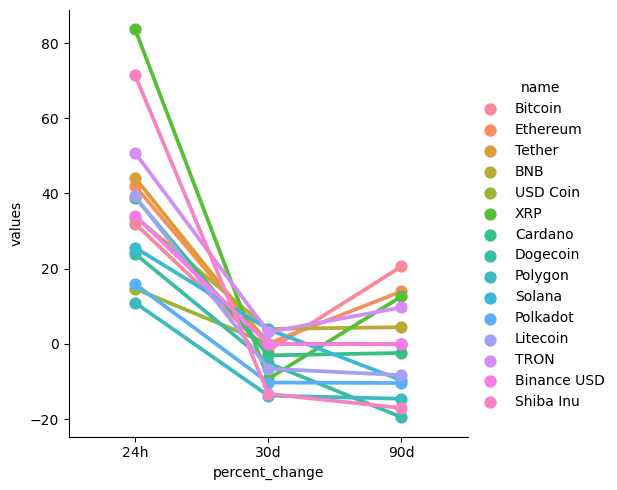

In [31]:
sns.catplot(x='percent_change', y ='values', hue='name',data=df7, kind='point')
plt.show()